# Instacart Grocery Basket Data Analysis

### Table of Contents:

#### 1. Import libraries

#### 2. Import the latest data set

#### 3. Address PII data

#### 4. Create a 'region' column

#### 5. Create an exclusion flag for low-activity customers (less than 5 orders)

#### 6. Customer profiling based on age group

#### 7. Customer profiling based on status

#### 8. Customer profiling based on gender

#### 9. Customer profiling based on income

#### 10. Investigate correlations among variables

#### 1. Import libraries

In [1]:
# import libraries for analysis and visualization

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 2. Import the latest data set

In [2]:
# set path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\4_Intro to Programming\Instacart Basket Analysis'

In [3]:
# import a data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_age_group.pkl'))

In [4]:
# check the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   n_dependants            int64  
 8   status                  object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  add_to_cart_order       int64  
 17  reordered               int64  
 18  product_name            object 
 19  aisle_id                int64  
 20  department_id           int64  
 21  prices                  float

In [5]:
# check the output

df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_prior_order,order_frequency_flag,age_group
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49


#### 3. Address PII data

In [6]:
# drop the 'first_name' and 'last_name' columns regarding the PII

df = df.drop(columns = ['first_name', 'last_name'])

In [7]:
# check the output

df.head()

,user_id,gender,state,age,date_joined,n_dependants,status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_prior_order,order_frequency_flag,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49


#### 4. Create a 'region' column

In [8]:
# create a loop

region = []

for value in df['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append('West')
    else:
        result.append('NaN')

In [9]:
# create a 'region' column

df['region'] = region

In [10]:
# check the output

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# investigate the correlation between 'region' and 'spending_flag' columns 

region_spending_habit = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

In [12]:
# check the output

region_spending_habit

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


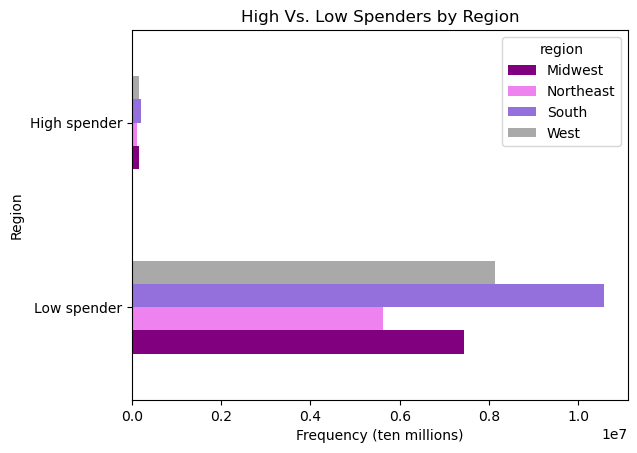

In [13]:
# create a visualization of the correlation between 'region' and 'spending_flag' columns 

bar_region_spending_habit = region_spending_habit.sort_values(by='spending_flag',ascending=False).plot.barh(title='High Vs. Low Spenders by Region',xlabel='Frequency (ten millions)',ylabel='Region', color=['purple','violet','mediumpurple','darkgrey'])

In [14]:
# export the visualization of the bar_region_spending_habit chart as a png file

bar_region_spending_habit.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending_habit.png'), bbox_inches='tight')

#### 5. Create an exclusion flag for low-activity customers (less than 5 orders)

In [10]:
# create a new column 'customer_activity_flag' for low-activity customers with less than 5 orders

df.loc[df['max_order'] >= 5, 'customer_activity_flag'] = 'high-activity customer'

In [11]:
df.loc[df['max_order'] < 5, 'customer_activity_flag'] = 'low-activity customer'

In [12]:
# check the output

df['customer_activity_flag'].value_counts(dropna = False)

customer_activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [13]:
# create a subset of low-activity customers

low_activity_customer=df[df['customer_activity_flag']=='low-activity customer']

In [14]:
# check the output

low_activity_customer.shape

(1440295, 33)

In [15]:
# export the subset of low-activity customers

low_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [16]:
# create a subset of high-activity customers

high_activity_customer=df[df['customer_activity_flag']=='high-activity customer']

In [17]:
# check the output

high_activity_customer.shape

(30964564, 33)

In [23]:
# export the subset of high-activity customers

high_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

#### 6. Customer profiling based on age group

In [18]:
# check all the columns
pd.options.display.max_columns=None
df.head()

,user_id,gender,state,age,date_joined,n_dependants,status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_prior_order,order_frequency_flag,age_group,region,customer_activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,mid-range product,Regularly busy,busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49,Midwest,high-activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,mid-range product,Regularly busy,regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49,Midwest,high-activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,mid-range product,Regularly busy,busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49,Midwest,high-activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,mid-range product,Regularly busy,regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49,Midwest,high-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,mid-range product,Regularly busy,slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,34-49,Midwest,high-activity customer


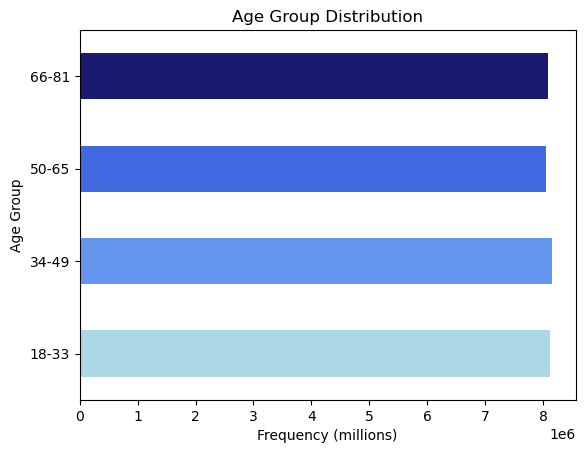

In [25]:
# create a visualization of the 'age_group' column

bar_age_group = df['age_group'].value_counts().sort_index().plot.barh(title='Age Group Distribution', xlabel='Frequency (millions)', ylabel='Age Group', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [26]:
# export the visualization of the 'bar_age_group' chart as a png file

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'), bbox_inches='tight')

In [27]:
# investigate a correlation between 'age_group' and 'region' columns

age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [28]:
# check the output

age_group_region

age_group,18-33,34-49,50-65,66-81
region,,,,
Midwest,1889049,1939142,1887497,1881637
Northeast,1431237,1428325,1404222,1458952
South,2737766,2714981,2669718,2669420
West,2062260,2070669,2081892,2078092


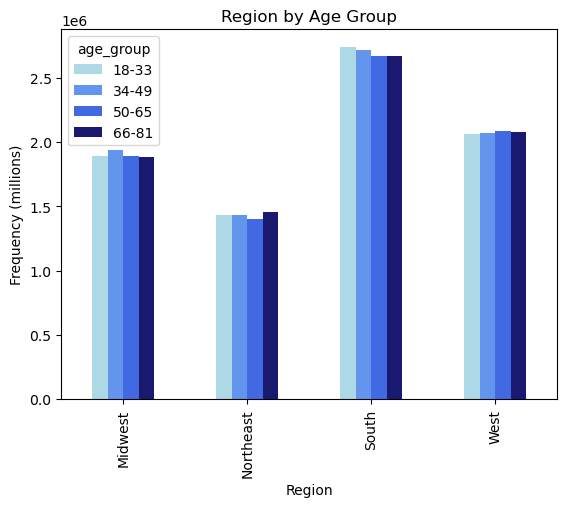

In [29]:
# create a visualization of the correlation between 'age_group' and 'region' columns

bar_age_group_region = age_group_region.plot.bar(title='Region by Age Group', xlabel='Region', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [30]:
# export the visualization of the 'bar_age_group_region' chart as a png file

bar_age_group_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_region.png'), bbox_inches='tight')

In [13]:
# import the 'departments_wrangled.csv' dataset

df_dep = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [14]:
# check the output

df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [15]:
# rename 'Unnamed: 0' column as 'department_id'

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [16]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [17]:
df_dep.shape

(21, 2)

In [18]:
# merge 'df' and 'df_dep' dataframes on the 'department_id' column

df_merged = df.merge(df_dep, on = ['department_id'])

df_merged.head()

In [19]:
# check the output

df_merged[['age_group', 'department_id', 'department']].tail(10)

,age_group,department_id,department
32404849,34-49,2,other
32404850,34-49,2,other
32404851,34-49,2,other
32404852,34-49,2,other
32404853,18-33,2,other
32404854,66-81,2,other
32404855,18-33,2,other
32404856,18-33,2,other
32404857,18-33,2,other
32404858,18-33,2,other


In [38]:
# export the dataframe

df_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

In [20]:
# import the updated dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

In [21]:
# check the output

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   n_dependants            int64  
 6   status                  object 
 7   income                  int64  
 8   order_id                int64  
 9   order_number            int64  
 10  orders_day_of_week      int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
 13  product_id              int64  
 14  add_to_cart_order       int64  
 15  reordered               int64  
 16  product_name            object 
 17  aisle_id                int64  
 18  department_id           int64  
 19  prices                  float64
 20  price_label             object 
 21  busiest_day             objec

In [41]:
# investigate a correlation between 'age_group' and 'department_id' columns

age_group_department = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [42]:
# check the output

age_group_department

age_group,18-33,34-49,50-65,66-81
department,,,,
alcohol,40549,38313,37886,36948
babies,104929,110692,104955,103226
bakery,294485,294268,292452,291223
beverages,666365,672960,673529,675269
breakfast,178114,176308,175042,173569
bulk,8738,8845,8381,8609
canned goods,269302,267420,265315,266021
dairy eggs,1361505,1363571,1327882,1345789
deli,262956,264999,261153,262141


In [43]:
# Sort values by aggregating frequency of each department

sorted_age_group_department = age_group_department.sum(axis=1).sort_values(ascending = True)

In [44]:
# check the output

sorted_age_group_department

department
bulk                 34573
other                36291
missing              69145
pets                 97716
alcohol             153696
international       269253
babies              423802
personal care       447572
breakfast           703033
meat seafood        708927
household           738666
dry goods pasta     866627
deli               1051249
canned goods       1068058
bakery             1172428
pantry             1875369
frozen             2234743
beverages          2688123
snacks             2887550
dairy eggs         5398747
produce            9479291
dtype: int64

In [45]:
age_group_department_sorted = age_group_department.loc[sorted_age_group_department.index]

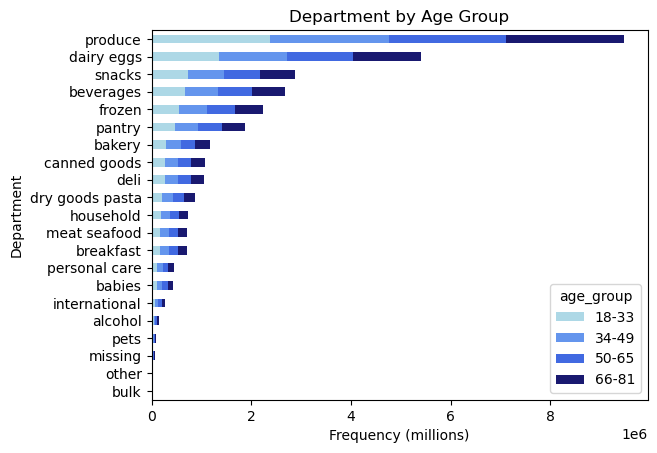

In [46]:
# create a visualization of the correlation between 'age_group' and 'department' columns

bar_age_group_department = age_group_department_sorted.plot.barh(title='Department by Age Group', xlabel='Frequency (millions)', ylabel='Department', color=['lightblue','cornflowerblue','royalblue','midnightblue'], stacked=True)

In [47]:
# export the visualization of the 'bar_age_group_department' chart as a png file

bar_age_group_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_department.png'), bbox_inches='tight')

In [48]:
# investigate a correlation between 'age_group' and 'spending_flag' columns

age_group_spending = pd.crosstab(df['spending_flag'], df['age_group'], dropna = False)

In [49]:
# check the output

age_group_spending

age_group,18-33,34-49,50-65,66-81
spending_flag,,,,
High spender,147108,178371,155832,152934
Low spender,7973204,7974746,7887497,7935167


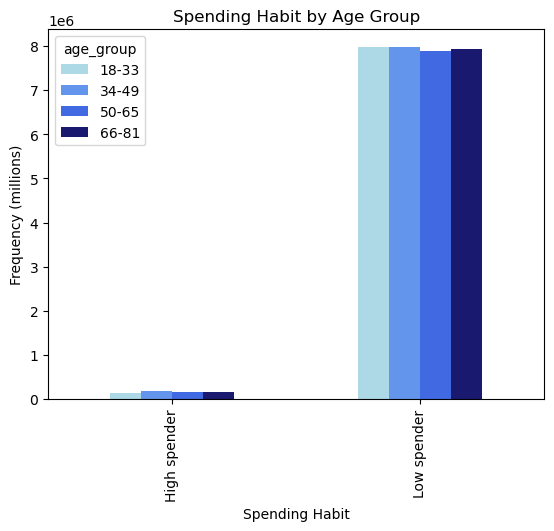

In [50]:
# create a visualization of the correlation between 'age_group' and 'spending_flag' columns

bar_age_group_spending_habit = age_group_spending.plot.bar(title='Spending Habit by Age Group', xlabel='Spending Habit', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [51]:
# export the visualization of the 'bar_age_group_spending_habit' chart as a png file

bar_age_group_spending_habit.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_spending_habit.png'), bbox_inches='tight')

In [52]:
# investigate a correlation between 'age_group' and 'loyalty_flag' columns

age_group_loyalty = pd.crosstab(df['loyalty_flag'], df['age_group'], dropna = False)

In [53]:
# check the output

age_group_loyalty

age_group,18-33,34-49,50-65,66-81
loyalty_flag,,,,
Loyal customer,2539109,2612642,2554504,2577838
New customer,1571963,1545612,1566164,1560251
Regular customer,4009240,3994863,3922661,3950012


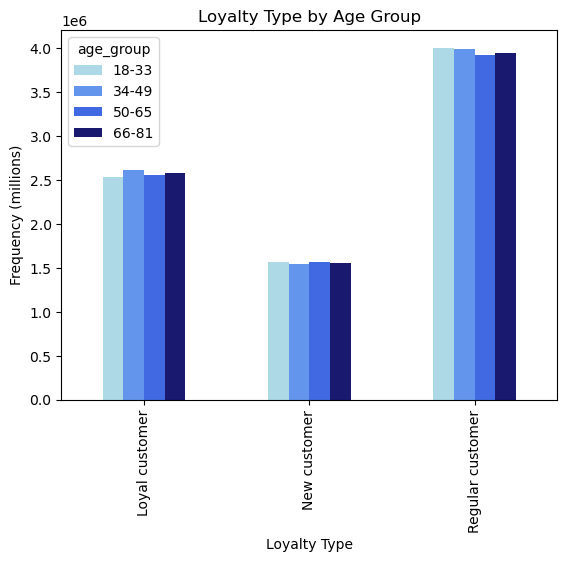

In [54]:
# create a visualization of the correlation between 'age_group' and 'loyalty_flag' columns

bar_age_group_loyalty = age_group_loyalty.plot.bar(title='Loyalty Type by Age Group', xlabel='Loyalty Type', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [55]:
# export the visualization of the 'bar_age_group_loyalty' chart as a png file

bar_age_group_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_loyalty.png'), bbox_inches='tight')

In [56]:
# investigate a correlation between 'age_group' and 'order_frequency_flag' columns

age_group_order_freq = pd.crosstab(df['order_frequency_flag'], df['age_group'], dropna = False)

In [57]:
# check the output

age_group_order_freq

age_group,18-33,34-49,50-65,66-81
order_frequency_flag,,,,
Frequent customer,5388492,5437107,5330912,5403342
Non-frequent customer,913705,914331,910931,897470
Regular customer,1818115,1801679,1801481,1787289


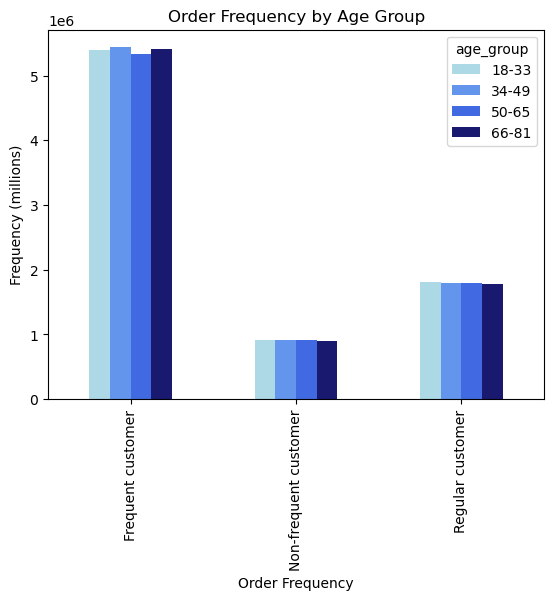

In [58]:
# create a visualization of the correlation between 'age_group' and 'order_frequency_flag' columns

bar_age_group_order_frequency = age_group_order_freq.plot.bar(title='Order Frequency by Age Group', xlabel='Order Frequency', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [59]:
# export the visualization of the 'bar_age_group_order_frequency' chart as a png file

bar_age_group_order_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_order_frequency.png'), bbox_inches='tight')

In [60]:
# investigate a correlation between 'age_group' and 'busiest_period_of_day' columns

age_group_busiest_period = pd.crosstab(df['busiest_period_of_day'], df['age_group'], dropna = False)

In [61]:
# check the output

age_group_busiest_period

age_group,18-33,34-49,50-65,66-81
busiest_period_of_day,,,,
Average orders,2277578,2309257,2271783,2296164
Fewest orders,1152273,1143006,1142606,1148324
Most orders,4690461,4700854,4628940,4643613


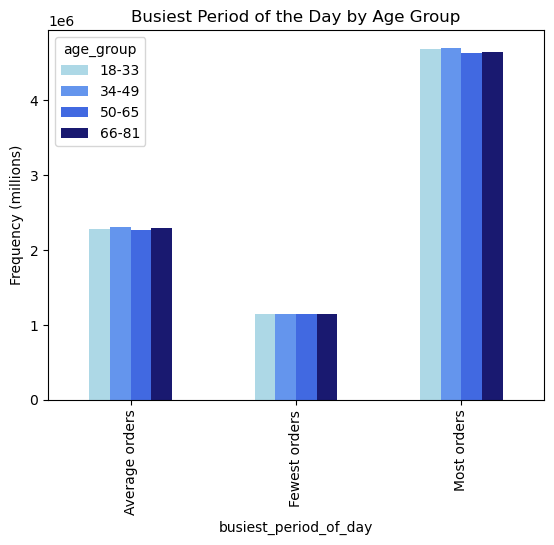

In [62]:
# create a visualization of the correlation between 'age_group' and 'order_frequency_flag' columns

bar_age_group_busiest_period_of_day = age_group_busiest_period.plot.bar(title='Busiest Period of the Day by Age Group', xlabel='busiest_period_of_day', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

In [63]:
# export the visualization of the 'bar_age_group_busiest_period_of_day' chart as a png file

bar_age_group_busiest_period_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_busiest_period_of_day.png'), bbox_inches='tight')

In [64]:
# investigate a correlation between the 'age_group' and 'order_hour_of_day' columns

age_group_order_hour = pd.crosstab(df['order_hour_of_day'], df['age_group'], dropna = False)

In [65]:
# check the output

age_group_order_hour

age_group,18-33,34-49,50-65,66-81
order_hour_of_day,,,,
0,56342,55941,53348,53138
1,29632,29701,28126,28241
2,18178,17803,16024,17370
3,13214,12834,12105,13128
4,13694,12373,13676,13499
5,22011,21329,22080,22541
6,75216,71058,71700,72519
7,222308,217104,224775,226867
8,427213,433160,426825,430920


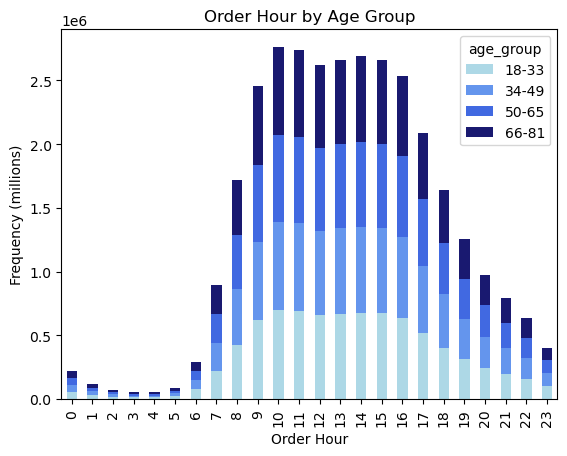

In [66]:
# create a visualization of the correlation between the 'age_group' and 'order_hour_of_day' columns

bar_age_group_order_hour = age_group_order_hour.plot.bar(title='Order Hour by Age Group', xlabel='Order Hour', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'], stacked=True)

In [67]:
# export the visualization of the 'bar_age_group_busiest_period_of_day' chart as a png file

bar_age_group_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_order_hour.png'), bbox_inches='tight')

In [68]:
# investigate a correlation between the 'age_group' and 'status' columns

age_group_status = pd.crosstab(df['status'], df['age_group'], dropna = False)

In [69]:
# check the output

age_group_status

age_group,18-33,34-49,50-65,66-81
status,,,,
divorced/widowed,0,0,773897,1997915
living with parents and siblings,1550603,0,0,0
married,4542396,6130902,5993269,6090186
single,2027313,2022215,1276163,0


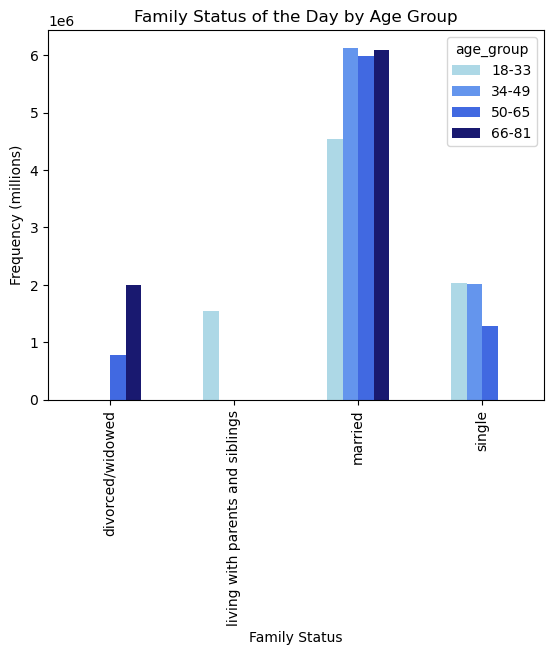

In [70]:
# create a visualization of the correlation between 'age_group' and 'order_frequency_flag' columns

bar_age_group_status = age_group_status.plot.bar(title='Family Status of the Day by Age Group', xlabel='Family Status', ylabel='Frequency (millions)', color=['lightblue','cornflowerblue','royalblue','midnightblue'])

#### 7. Customer profiling based on status

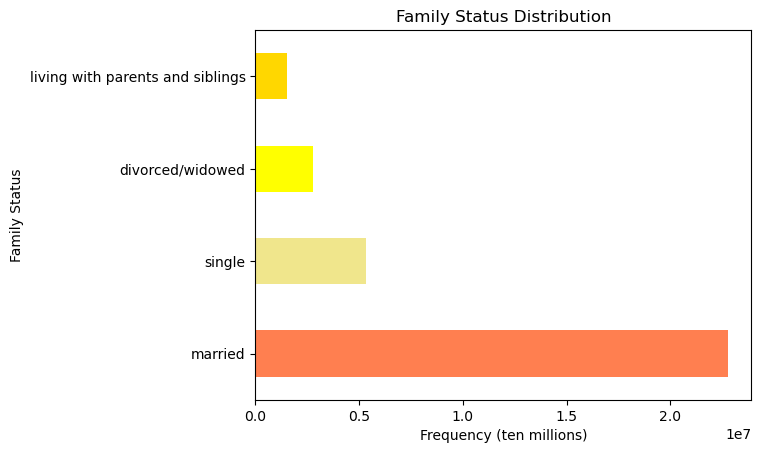

In [71]:
# create a visualization of the 'status' column

bar_status = df['status'].value_counts().plot.barh(title='Family Status Distribution', xlabel='Frequency (ten millions)', ylabel='Family Status', color=['coral','khaki','yellow','gold'])

In [72]:
# export the visualization of the 'family status' chart

bar_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_status.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Family Status Vs. Age Correlation')

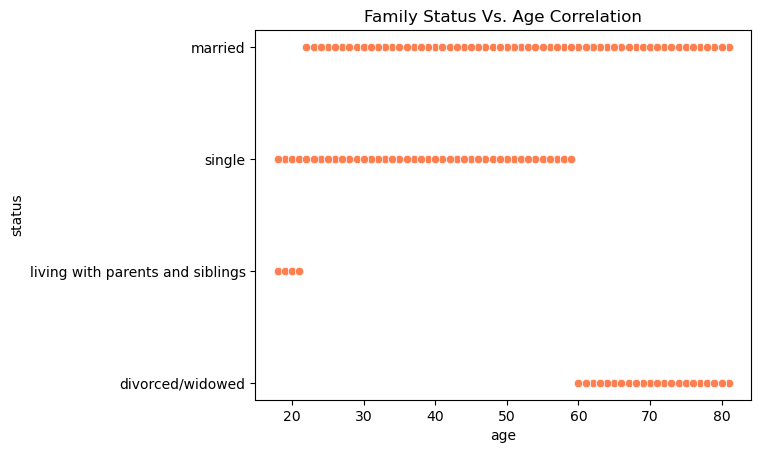

In [73]:
# create a visualization  of the correlation between 'age_group' and 'status' columns

scatterplot_age_status = sns.scatterplot(x = 'age', y = 'status', data = df, color=['coral'] )
plt.title('Family Status Vs. Age Correlation')

In [74]:
# export the visualization of the 'scatterplot_age_status' chart as a png file

scatterplot_age_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_status.png'), bbox_inches='tight')

In [22]:
# create a new column 'status_dependant_status'

df.loc[(df['status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df['n_dependants'] == 0), 'family_dependant_status'] = 'single with no dependants'

In [23]:
df.loc[(df['status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df['n_dependants'] >= 1), 'family_dependant_status'] = 'single with dependants'

In [24]:
df.loc[(df['status'].isin(['married'])) & (df['n_dependants'] == 1), 'family_dependant_status'] = 'married with no dependants'

In [25]:
df.loc[(df['status'].isin(['married'])) & (df['n_dependants'] > 1), 'family_dependant_status'] = 'married with dependants'

In [26]:
# check the output

df['family_dependant_status'].value_counts(dropna = False)

family_dependant_status
married with dependants       15205849
single with no dependants      8097503
married with no dependants     7550904
single with dependants         1550603
Name: count, dtype: int64

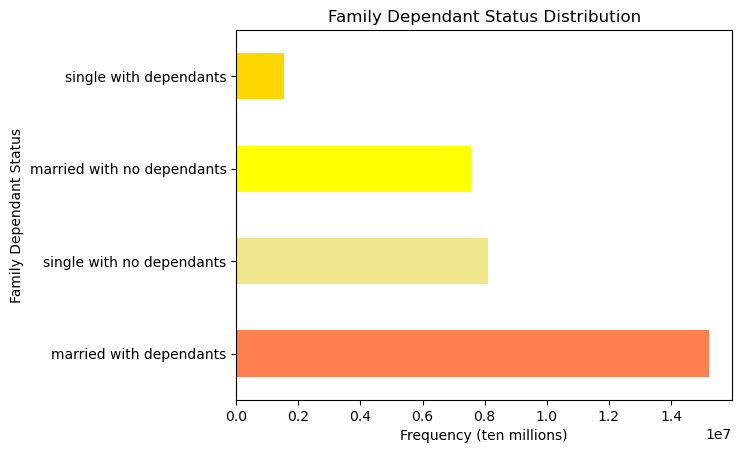

In [80]:
# create a visualization of the 'family_dependant_status' column

bar_family_dependant_status = df['family_dependant_status'].value_counts().plot.barh(title='Family Dependant Status Distribution', xlabel='Frequency (ten millions)', ylabel='Family Dependant Status', color=['coral','khaki','yellow','gold'])

In [81]:
# export the visualization of the 'bar_family_dependant_status' chart

bar_family_dependant_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_dependant_status.png'), bbox_inches='tight')

In [82]:
# investigate a correlation between the 'family_dependant_status' and 'order_frequency_flag' columns

family_dependant_status_order_frequency = pd.crosstab(df['order_frequency_flag'], df['family_dependant_status'], dropna = False)

In [83]:
# check the output

family_dependant_status_order_frequency

family_dependant_status,married with dependants,married with no dependants,single with dependants,single with no dependants
order_frequency_flag,,,,
Frequent customer,10107641,5029740,1047100,5375372
Non-frequent customer,1698189,866448,175019,896781
Regular customer,3400014,1654716,328484,1825350


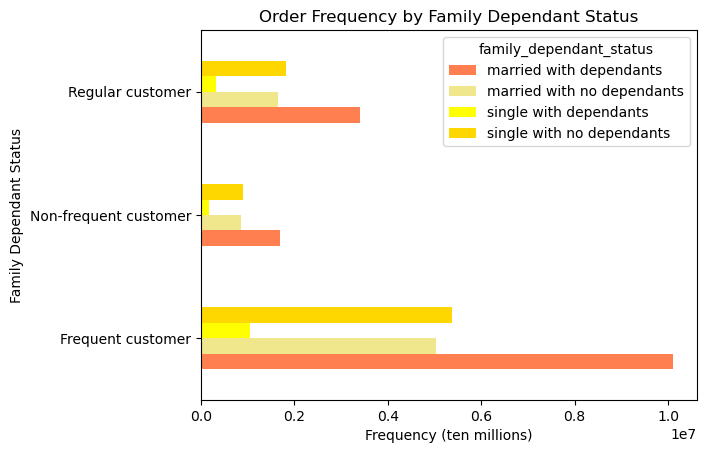

In [84]:
# create a visualization of the 'family_dependant_status' and 'order_frequency_flag' columns

bar_family_dependant_status_order_frequency = family_dependant_status_order_frequency.plot.barh(title='Order Frequency by Family Dependant Status', xlabel='Frequency (ten millions)', ylabel='Family Dependant Status', color=['coral','khaki','yellow','gold'])

In [85]:
# export the visualization of the 'bar_family_dependant_status_order_frequency' chart

bar_family_dependant_status_order_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_dependant_status_order_frequency.png'), bbox_inches='tight')

#### 8. Customer profiling based on gender

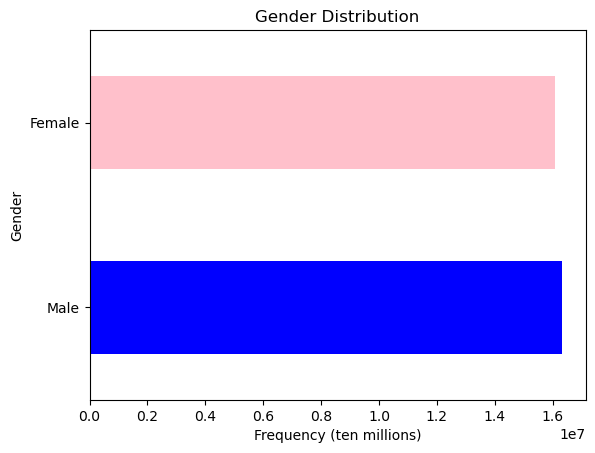

In [86]:
# create a visualization of the 'gender' column

bar_gender = df['gender'].value_counts().plot.barh(title='Gender Distribution', xlabel='Frequency (ten millions)', ylabel='Gender', color=['blue','pink'])

In [87]:
# export the visualization of the 'gender' chart as a png file

bar_gender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_gender.png'), bbox_inches='tight')

In [88]:
# investigate a correlation between 'gender' and 'loyalty_flag' columns

gender_loyalty = pd.crosstab(df['loyalty_flag'], df['gender'], dropna = False)

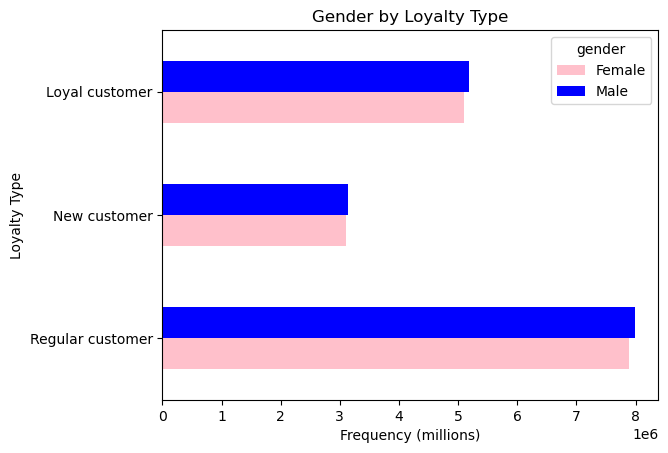

In [89]:
# create a visualization of the correlation between 'gender' and 'loyalty_flag' columns

bar_gender_loyalty = gender_loyalty.sort_values(by='loyalty_flag',ascending=False).plot.barh(title='Gender by Loyalty Type', xlabel='Frequency (millions)', ylabel='Loyalty Type', color=['pink','blue'])

In [90]:
# export the visualization of the 'bar_gender_loyalty' chart as a png file

bar_gender_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_gender_loyalty.png'), bbox_inches='tight')

In [91]:
# investigate a correlation between 'gender' and 'department_id' columns

gender_department = pd.crosstab(df['department'], df['gender'], dropna = False)

In [92]:
# check the output

gender_department

gender,Female,Male
department,,
alcohol,79313,74383
babies,207129,216673
bakery,584935,587493
beverages,1337945,1350178
breakfast,350297,352736
bulk,17321,17252
canned goods,526457,541601
dairy eggs,2684188,2714559
deli,522632,528617


In [93]:
# Sort values by aggregating frequency of each department

sorted_gender_department = gender_department.sum(axis=1).sort_values(ascending = True)

In [94]:
gender_department_sorted = gender_department.loc[sorted_gender_department.index]

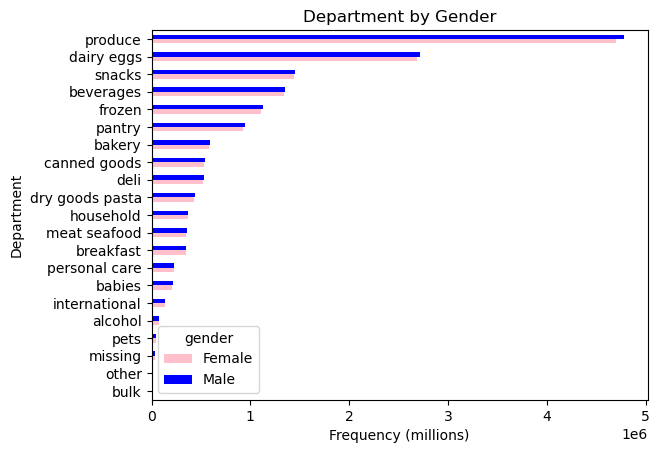

In [95]:
# create a visualization of the correlation between 'gender' and 'department' columns

bar_gender_department = gender_department_sorted.plot.barh(title='Department by Gender', xlabel='Frequency (millions)', ylabel='Department', color=['pink','blue'])

In [96]:
# export the visualization of the 'bar_gender_department' chart as a png file

bar_gender_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_gender_department.png'), bbox_inches='tight')

#### 9. Customer profiling based on income

In [97]:
# check the income info

df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [27]:
# create a new column 'income_range' 

df.loc[df['income'] < 52200, 'income_range'] = 'Low income'

In [28]:
df.loc[(df['income'] >= 52200) & (df['income'] < 156600), 'income_range'] = 'Middle income'

In [29]:
df.loc[df['income'] >= 156600, 'income_range'] = 'High income'

In [30]:
# check the output

df['income_range'].value_counts(dropna = False)

income_range
Middle income    25626429
Low income        3940657
High income       2837773
Name: count, dtype: int64

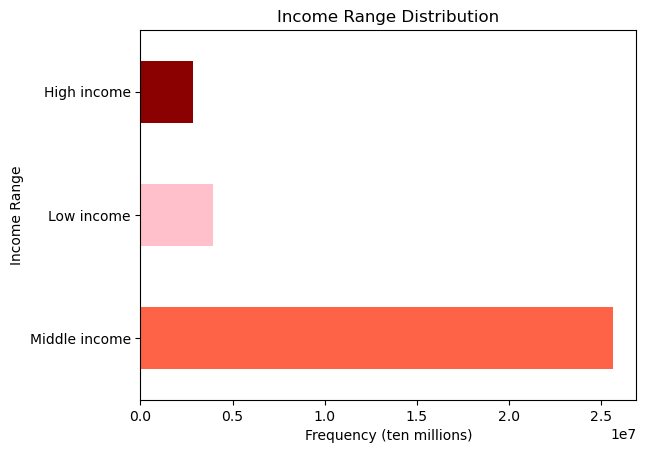

In [102]:
# create a visualization of the 'income' column

bar_income = df['income_range'].value_counts().plot.barh(title='Income Range Distribution', xlabel='Frequency (ten millions)', ylabel='Income Range', color=['tomato','pink','darkred'])

In [103]:
# export the visualization of the 'income range' chart as a png file

bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income.png'), bbox_inches='tight')

In [104]:
# investigate a correlation between 'income_range' and 'spending_flag' columns

income_range_spending_habit = pd.crosstab(df['spending_flag'],df['income_range'], dropna = False)

In [105]:
# check the output

income_range_spending_habit

income_range,High income,Low income,Middle income
spending_flag,,,
High spender,369697,2701,261847
Low spender,2468076,3937956,25364582


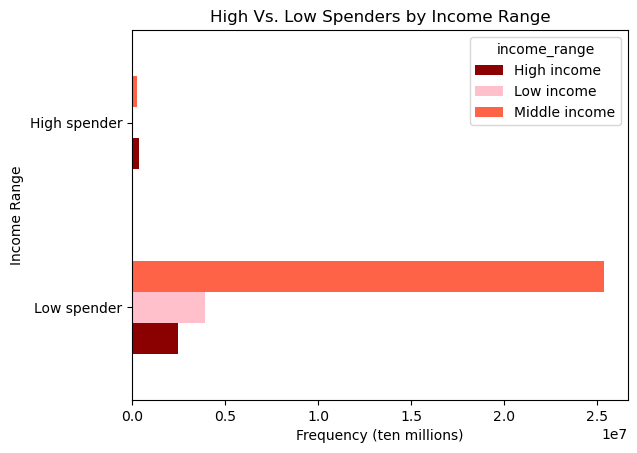

In [106]:
# create a visualization of a correlation between 'income_range' and 'spending_flag' columns

bar_income_range_spending_habit = income_range_spending_habit.sort_values(by='spending_flag',ascending=False).plot.barh(title='High Vs. Low Spenders by Income Range', xlabel='Frequency (ten millions)', ylabel='Income Range', color=['darkred','pink','tomato'])

In [107]:
# export the visualization of the 'bar_income_range_spending_habit' chart as a png file

bar_income_range_spending_habit.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_range_spending_habit.png'), bbox_inches='tight')

In [31]:
# create a subset for only high_income

high_income = df.loc[df['income_range'] == 'High income']

In [32]:
# check the output

high_income.shape

(2837773, 36)

In [110]:
# investigate a correlation between the 'high_income' and 'department' columns

high_income_department = pd.crosstab(high_income['department'], high_income['income_range'], dropna = False)

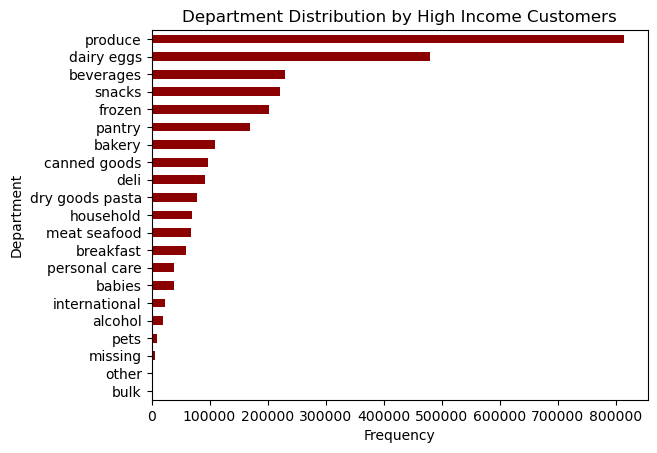

In [111]:
# create a visualization of the 'high_income' and 'department' columns

bar_high_income_department = high_income['department'].value_counts().sort_values(ascending=True).plot.barh(title='Department Distribution by High Income Customers', xlabel='Frequency', ylabel='Department', color='darkred')

In [112]:
# export the visualization of the 'bar_high_income_department' chart as a png file

bar_high_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_high_income_department.png'), bbox_inches='tight')

#### 10. Investigate correlations among variables

In [113]:
# investigate a correlation between 'region' and 'department_id' columns

region_department = pd.crosstab(df_merged['department'], df_merged['region'], dropna = False)

In [114]:
# check the output

region_department

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


In [115]:
# Sort values by aggregating frequency of each department

sorted_region_department = region_department.sum(axis=1).sort_values(ascending = True)

In [116]:
region_department_sorted = region_department.loc[sorted_region_department.index]

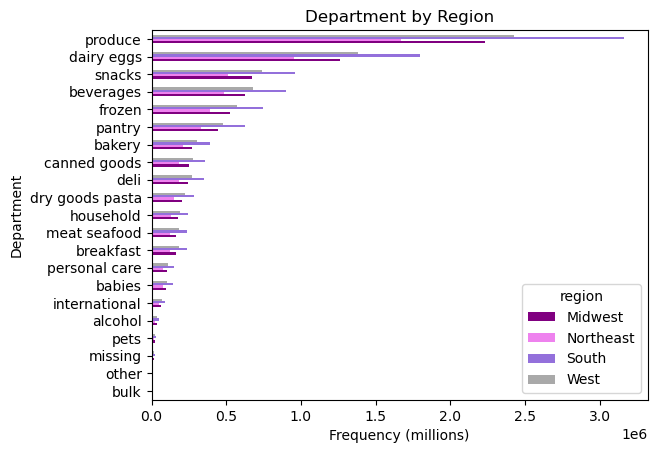

In [117]:
# create a visualizationof the correlation between 'region' and 'department' columns

bar_region_department = region_department_sorted.plot.barh(title='Department by Region', xlabel='Frequency (millions)', ylabel='Department', color=['purple','violet','mediumpurple','darkgrey'])

In [118]:
# export the visualization of the 'bar_region_department' chart

bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_department.png'), bbox_inches='tight')

In [119]:
# investigate the correlation between 'spending_flag' and 'loyalty_flag' columns

spending_loyalty = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

In [120]:
# check the output

spending_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,216600,114831,302814
Low spender,10067493,6129159,15573962


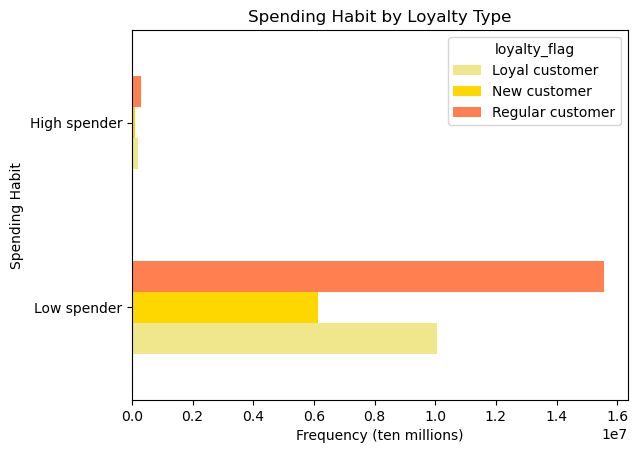

In [121]:
# create a visualization of the correlation between 'spending_flag' and 'loyalty_flag' columns

bar_spending_loyalty = spending_loyalty.sort_values(by='spending_flag',ascending=False).plot.barh(title='Spending Habit by Loyalty Type', xlabel='Frequency (ten millions)', ylabel='Spending Habit', color=['khaki','gold','coral'])

In [122]:
# export the visualization of the 'bar_spending_loyalty' chart

bar_spending_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_loyalty.png'), bbox_inches='tight')

In [123]:
# investigate a correlation between 'loyalty_flag' and 'department_id' columns

loyalty_department = pd.crosstab(df_merged['department'], df_merged['loyalty_flag'], dropna = False)

In [124]:
# check the output

loyalty_department

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


In [125]:
# Sort values by aggregating frequency of each department

sorted_loyalty_department = loyalty_department.sum(axis=1).sort_values(ascending = True)

In [126]:
loyalty_department_sorted = loyalty_department.loc[sorted_loyalty_department.index]

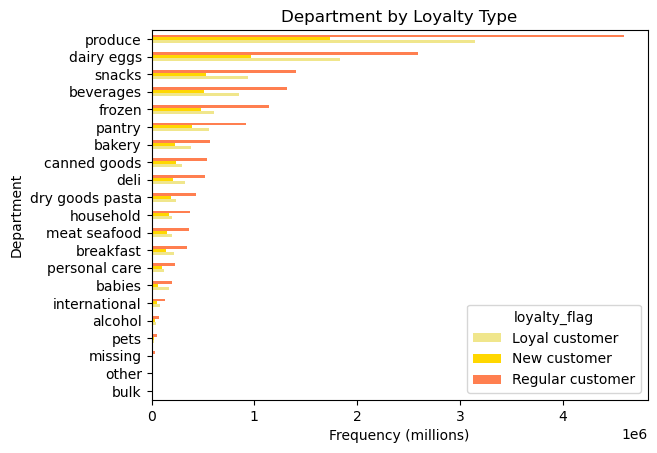

In [127]:
# create a visualization of the correlation between 'loyalty_flag' and 'department' columns

bar_loyalty_department = loyalty_department_sorted.plot.barh(title='Department by Loyalty Type', xlabel='Frequency (millions)', ylabel='Department', color=['khaki','gold','coral'])

In [128]:
# export the visualization of the 'bar_loyalty_department' chart

bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_department.png'), bbox_inches='tight')

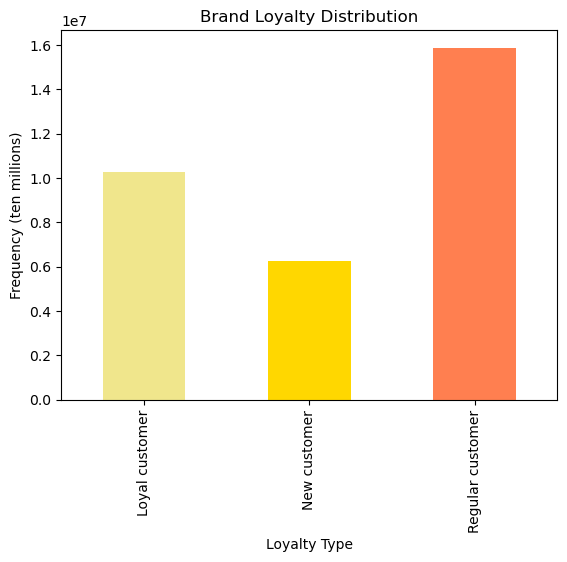

In [129]:
# create a visualization of 'loyalty_flag' column

bar_loyalty = df['loyalty_flag'].value_counts().sort_index().plot.bar(title='Brand Loyalty Distribution', xlabel='Loyalty Type', ylabel='Frequency (ten millions)', color=['khaki','gold','coral'])

In [130]:
# export the visualization of the 'bar_loyalty' chart as a png file

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'), bbox_inches='tight')

In [37]:
# create some random samples split into two dataframes at a 70/30 ratio
# create a list holding True/False values to the test np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [38]:
# store 70% of the sample in the dataframe big

big = df[dev]

In [39]:
# store 30% of the sample in the dataframe small

small = df[~dev]

In [40]:
# check number of rows

len(df)

32404859

In [41]:
len(big) + len(small)

32404859

In [42]:
# create a sample dataframe with 'order_hour_of_day' and 'prices' columns

df_sample_order_hour_prices = small[['order_hour_of_day', 'prices']]

Text(0, 0.5, 'Average Spending ($)')

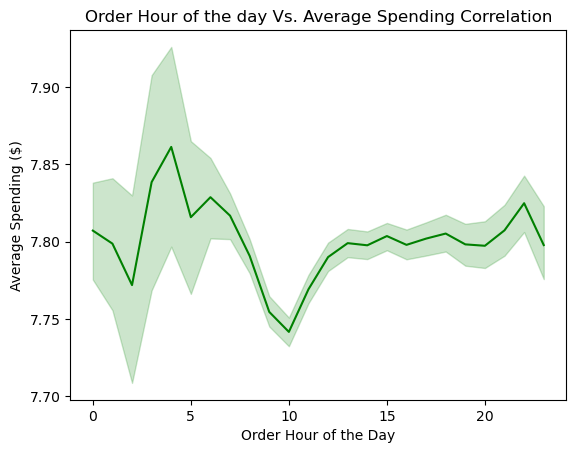

In [43]:
# create a line chart of a sample dataframe with 'order_hour_of_day' and 'prices' columns

line_order_hour_prices = sns.lineplot(data = df_sample_order_hour_prices, x = 'order_hour_of_day', y = 'prices', color='green')
plt.title('Order Hour of the day Vs. Average Spending Correlation')
plt.xlabel('Order Hour of the Day')
plt.ylabel('Average Spending ($)')

In [44]:
# export the visualization of the 'line_order_hour_prices' chart as a png file

line_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_prices.png'), bbox_inches='tight')

In [33]:
# create a subset for only high_spender

high_spender = df.loc[df['spending_flag'] == 'High spender']

In [34]:
high_spender.shape

(634245, 36)

In [48]:
# investigate a correlation between the 'high_spender' and 'order_hour_of_day' columns

high_spender_order_hour = pd.crosstab(high_spender['order_hour_of_day'], high_spender['spending_flag'], dropna = False)

In [49]:
high_spender_order_hour

spending_flag,High spender
order_hour_of_day,
0,3773
1,2217
2,1797
3,1202
4,1351
5,2057
6,6747
7,18489
8,32002


Text(0, 0.5, 'Frequency')

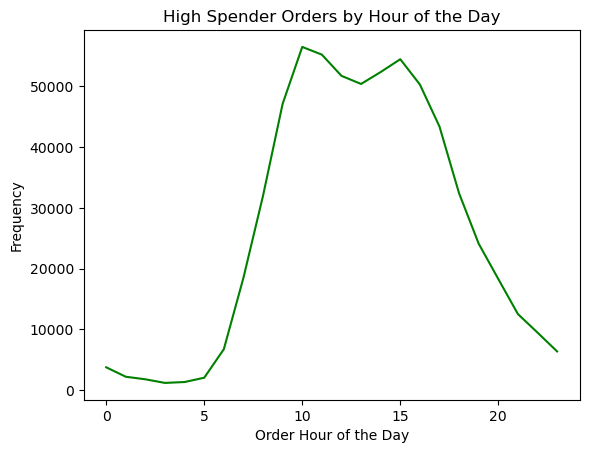

In [50]:
# create a visualization of the correlation between 'high spender' and 'order_hour_of_day' columns

line_high_spender_order_hour = sns.lineplot(data = high_spender_order_hour, x = 'order_hour_of_day', y = 'High spender', color='green')
plt.title('High Spender Orders by Hour of the Day')
plt.xlabel('Order Hour of the Day')
plt.ylabel('Frequency')

In [51]:
# export the visualization of the 'line_high_spender_order_hour' chart as a png file

line_high_spender_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_high_spender_order_hour.png'), bbox_inches='tight')

In [52]:
# investigate a correlation between the 'high_spender' and 'department' columns

high_spender_department = pd.crosstab(high_spender['department'], high_spender['spending_flag'], dropna = False)

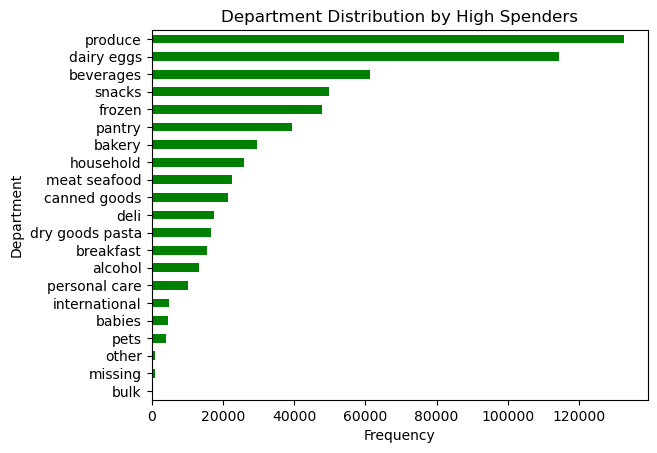

In [53]:
# create a visualization of the 'high_spender' and 'department' columns

bar_high_spender_department = high_spender['department'].value_counts().sort_values(ascending=True).plot.barh(title='Department Distribution by High Spenders', xlabel='Frequency', ylabel='Department', color='green')

In [54]:
# export the visualization of the 'bar_high_spender_department' chart as a png file

bar_high_spender_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_high_spender_department.png'), bbox_inches='tight')

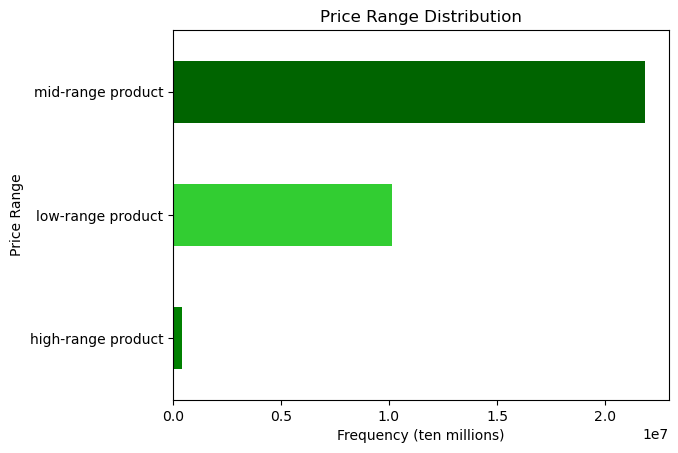

In [55]:
# create a visualization of 'price_label' column

bar_price_label = df['price_label'].value_counts().sort_index().plot.barh(title='Price Range Distribution', xlabel='Frequency (ten millions)', ylabel='Price Range', color=['green','limegreen','darkgreen'])

In [56]:
# export the visualization of the 'bar_price_label' chart as a png file

bar_price_label.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_label.png'), bbox_inches='tight')

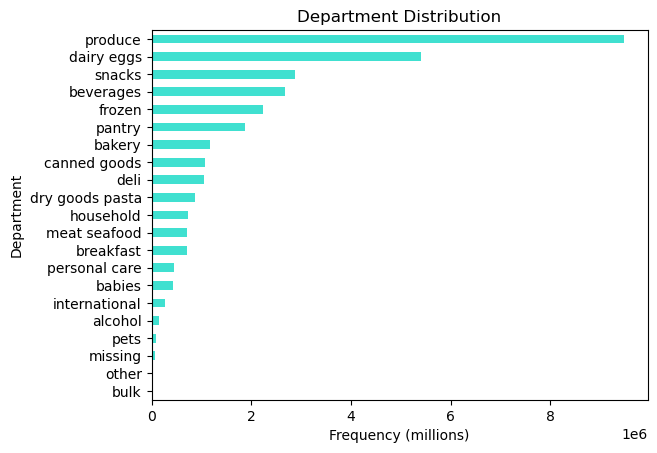

In [57]:
# create a visualization of 'department' column

bar_department = df['department'].value_counts().sort_values(ascending=True).plot.barh(title='Department Distribution', xlabel='Frequency (millions)', ylabel='Department', color='turquoise')

In [58]:
# export the visualization of the 'bar_department' chart as a png file

bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'), bbox_inches='tight')

In [35]:
df.shape

(32404859, 36)

In [36]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'status', 'income', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_prior_order', 'order_frequency_flag',
       'age_group', 'region', 'customer_activity_flag', 'department',
       'family_dependant_status', 'income_range'],
      dtype='object')

In [37]:
# export the dataframe

df.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))